In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import geoplot as gplt
import geoplot.crs as gcrs

C:\Users\Ricardo\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\Ricardo\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\Ricardo\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted th

In [2]:
sp_shp = gpd.read_file('C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/raw/municipio_sp.shp')

In [3]:
gdf_agencias_sp = pd.read_csv('C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/agencias_latlong.csv', sep=';')

In [4]:
# Set crs to use degrees in the first moment
# https://gis.stackexchange.com/questions/345071/matching-x-and-y-axis-coordinates-of-two-geopandas-geometries-to-overlay-them
gdf_agencias_sp_points = gpd.GeoDataFrame(gdf_agencias_sp, geometry=gpd.points_from_xy(gdf_agencias_sp['lon'], gdf_agencias_sp['lat']), crs=4326)

In [5]:
# Then, set the crs of points to the crs of shapefile map which is in meters
gdf_agencias_sp_points = gdf_agencias_sp_points.to_crs(sp_shp.crs)

In [6]:
# Spatial join to get only the points inside polygon
gdf_agencias_sp_points_join = gpd.sjoin(gdf_agencias_sp_points, sp_shp, predicate='within')

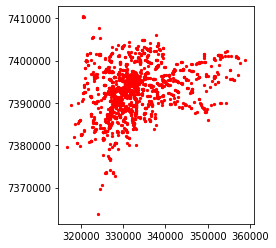

In [7]:
gdf_agencias_sp_points_join.plot(marker='o', color='red', markersize=5);

In [8]:
sp_shp = sp_shp.to_crs(epsg=4326)

In [9]:
gdf_agencias_sp_points_join = gdf_agencias_sp_points_join.to_crs(epsg=4326)

ValueError: 96 values were passed to 'clip', but 2121 were expected.

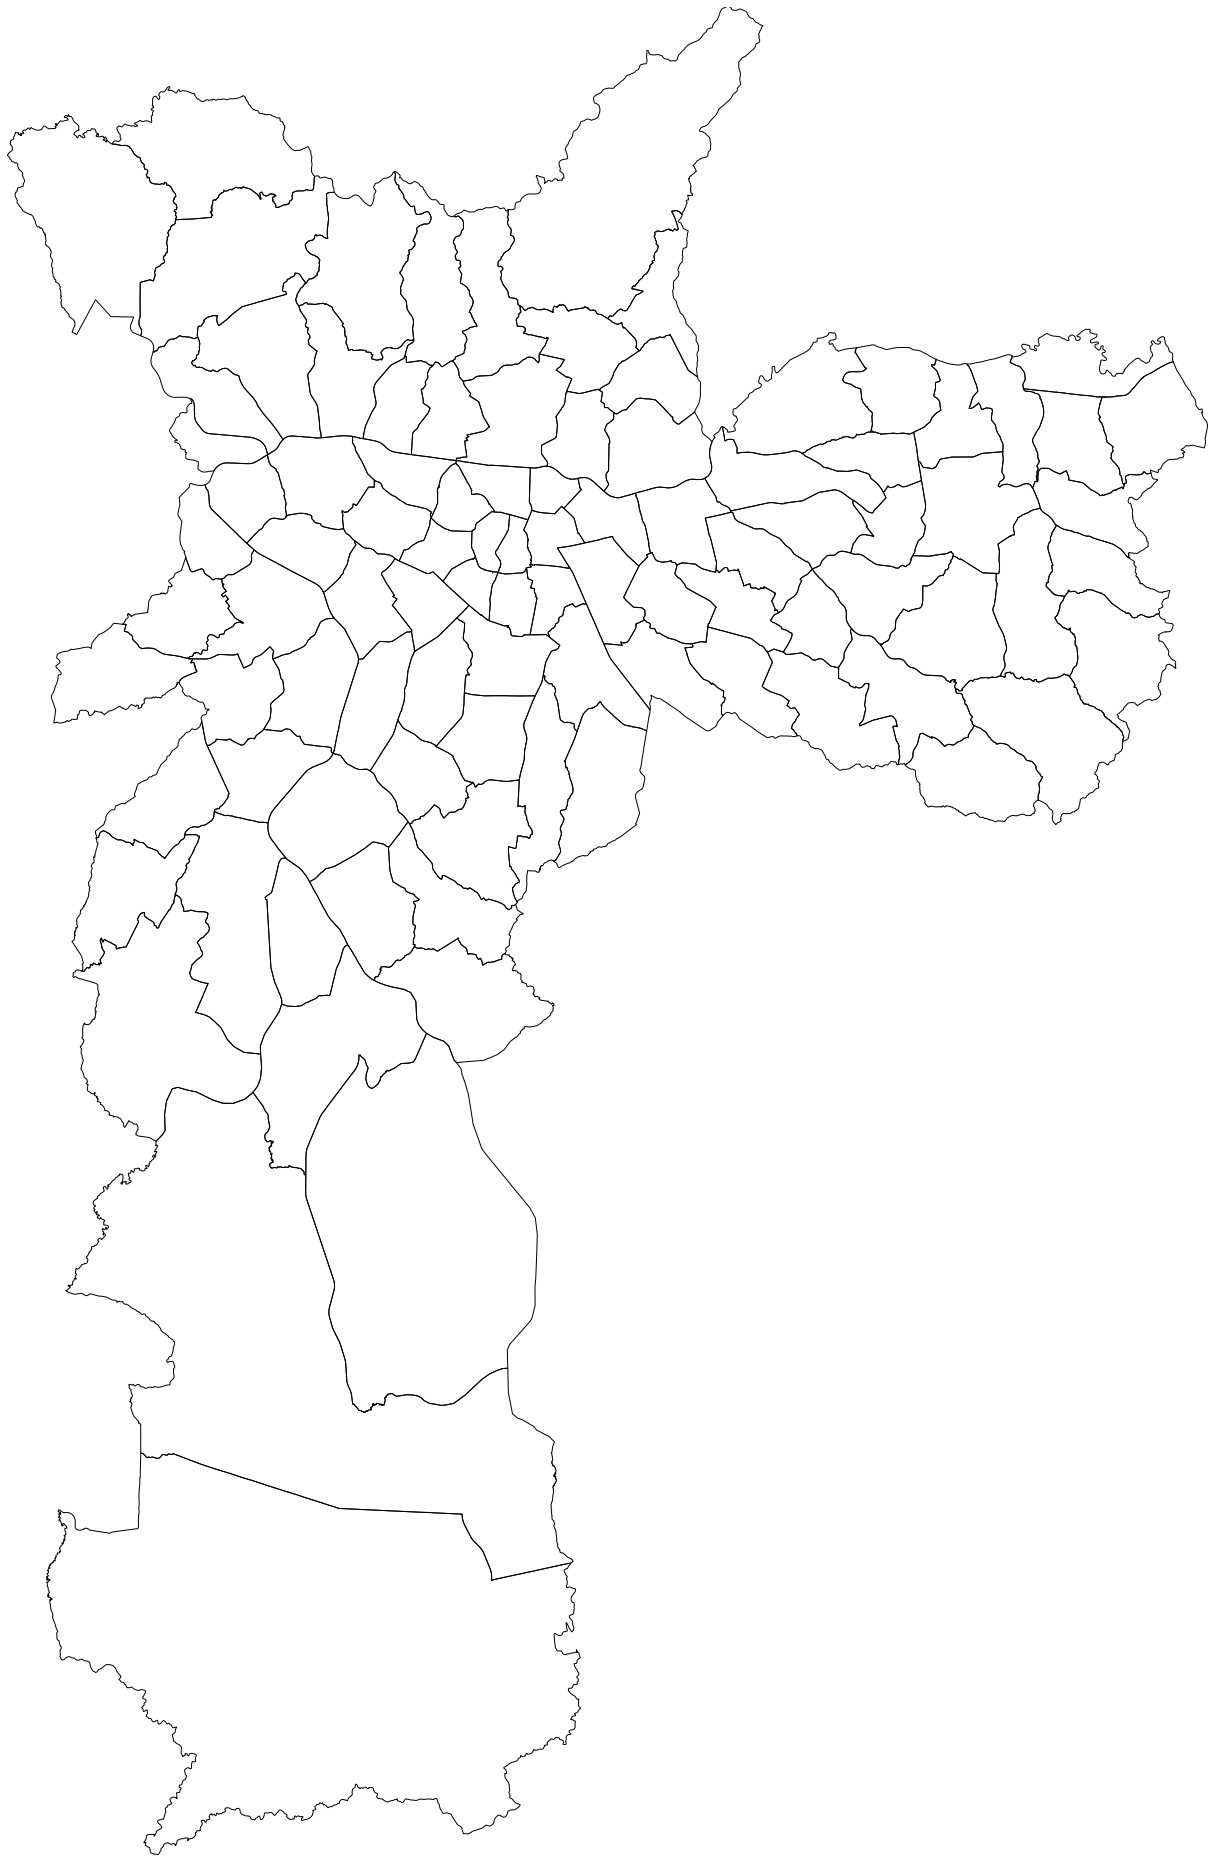

In [52]:
# https://residentmario.github.io/geoplot/plot_references/plot_reference.html?highlight=clip#kdeplot
# https://geopandas.org/en/stable/gallery/plotting_with_geoplot.html?highlight=heatmap
# https://residentmario.github.io/geoplot/api_reference.html?highlight=albersequalarea#geoplot.crs.AlbersEqualArea

# Calculate the bounds of the to kdeplot print all its extension
extent= sp_shp.total_bounds

ax = gplt.polyplot(sp_shp, projection=gcrs.Orthographic(), zorder=1, figsize=(40, 34))
gplt.kdeplot(gdf_agencias_sp_points_join, cmap='Reds', shade=True, n_levels=9, extent=extent, cbar=True, ax=ax)
# gplt.kdeplot(gdf_agencias_sp_points_join, cmap='Reds', shade=True, shade_lowest=True, n_levels=9, extent=extent, cbar=True, clip=sp_shp, ax=ax)

In [26]:
[sp_shp.geometry.x, sp_shp.geometry.y]

array([-46.82625159, -24.00812544, -46.36509961, -23.35658521])

In [42]:
g = [i for i in sp_shp.geometry]

all_coords = []
for b in g[0].boundary: # for first feature/row
    coords = np.dstack(b.coords.xy).tolist()
    all_coords.append(*coords)                 

all_coords

In [46]:
sp_shp.bounds

,minx,miny,maxx,maxy
0,-46.447510,-23.594793,-46.414844,-23.533411
1,-46.762172,-23.725969,-46.719581,-23.640478
2,-46.502210,-23.554675,-46.473462,-23.523811
3,-46.764083,-23.520782,-46.726374,-23.494926
4,-46.597133,-23.612076,-46.550464,-23.572985
...,...,...,...,...
91,-46.597085,-23.529890,-46.555503,-23.494795
92,-46.653610,-23.599822,-46.614094,-23.567817
93,-46.548418,-23.554910,-46.493371,-23.527112
94,-46.663617,-23.541835,-46.639224,-23.517840
